In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Importance sampling distribution (normal with mean mu and variance sigma^2)
def importance_sampling_distribution(x, mu=5, sigma=1):
    return norm.pdf(x, loc=mu, scale=sigma)

# Standard Monte Carlo method to estimate P(X > a)
def monte_carlo_standard(a, num_samples):
    # Draw samples from N(0, 1)
    samples = np.random.normal(0, 1, num_samples)
    
    # Estimate the probability P(X > a)
    estimate = np.mean(samples > a)
    return estimate

# Importance Sampling method to estimate P(X > a)
def monte_carlo_importance_sampling(a, num_samples, mu=5):
    # Draw samples from the importance sampling distribution N(mu, 1)
    samples = np.random.normal(mu, 1, num_samples)
    
    # Calculate the weights (likelihood ratio)
    weights = norm.pdf(samples) / importance_sampling_distribution(samples, mu=mu)
    
    # Estimate P(X > a) using importance sampling
    estimate = np.mean(weights * (samples > a))
    return estimate

Standard Monte Carlo estimate of P(X > 5): 0.0
Importance Sampling estimate of P(X > 5): 2.871587350517089e-07
Real probability: 2.866515719235352e-07


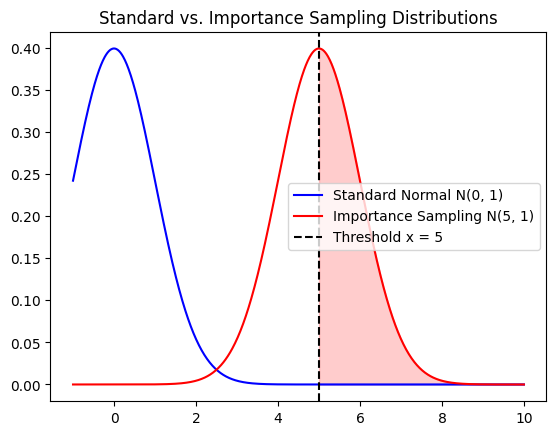

In [9]:
# Parameters
a = 5  # Rare event threshold
num_samples = 100000  # Number of Monte Carlo samples

# Perform standard Monte Carlo simulation
standard_estimate = monte_carlo_standard(a, num_samples)

# Perform importance sampling simulation
importance_sampling_estimate = monte_carlo_importance_sampling(a, num_samples, mu=5)

# Compute the real probability using the CDF of the standard normal
real_probability = 1 - norm.cdf(a)

# Display the results
print(f"Standard Monte Carlo estimate of P(X > {a}): {standard_estimate}")
print(f"Importance Sampling estimate of P(X > {a}): {importance_sampling_estimate}")
print(f"Real probability: {real_probability}")

# Plotting the distributions and sampling regions for visualization
x = np.linspace(-1, 10, 1000)
plt.plot(x, norm.pdf(x), label='Standard Normal N(0, 1)', color='blue')
plt.plot(x, importance_sampling_distribution(x, mu=5), label='Importance Sampling N(5, 1)', color='red')
plt.axvline(a, color='black', linestyle='--', label=f'Threshold x = {a}')
plt.fill_between(x, 0, norm.pdf(x), where=(x > a), color='blue', alpha=0.2)
plt.fill_between(x, 0, importance_sampling_distribution(x, mu=5), where=(x > a), color='red', alpha=0.2)
plt.title("Standard vs. Importance Sampling Distributions")
plt.legend()
plt.show()